In [185]:
# Start writing code here...
import pandas as pd

In [186]:
df = pd.read_csv("matrice.csv")
df.head()

,Unnamed: 0,SIRET,Code_postal,Numero_inspection,Date_inspection,Agrement,synthese_eval_encode,month,month_sin,month_cos,day,day_sin,day_cos,activite_category,departement
0,0,30247464800789,92240,15914760,2021-03-03 00:00:00+00:00,0,1.0,3,1.000000,6.123234e-17,3,0.051620,0.998667,1,92
1,1,30112032500024,69500,16252422,2021-11-26 00:00:00+00:00,0,0.0,11,-0.500000,8.660254e-01,11,0.188227,0.982126,58,69
2,2,30247464801894,92800,15903092,2021-02-22 00:00:00+00:00,0,0.0,2,0.866025,5.000000e-01,2,0.034422,0.999407,1,92
3,3,30890741900011,78460,15901554,2021-02-19 00:00:00+00:00,0,1.0,2,0.866025,5.000000e-01,2,0.034422,0.999407,72,78
4,4,30668909200022,94290,15968279,2021-04-14 00:00:00+00:00,0,1.0,4,0.866025,-5.000000e-01,4,0.068802,0.997630,1,94


In [187]:
for i in df:
    try:
        df[i] = df[i].astype(int)
    except:
        print(i)

SIRET
Numero_inspection
Date_inspection


In [188]:
data = df.copy()
data = data.drop(['SIRET', 'Numero_inspection', 'Date_inspection','month_cos','month_sin','day_cos','day_sin',], axis=1)
data.head()

,Unnamed: 0,Code_postal,Agrement,synthese_eval_encode,month,day,activite_category,departement
0,0,92240,0,1,3,3,1,92
1,1,69500,0,0,11,11,58,69
2,2,92800,0,0,2,2,1,92
3,3,78460,0,1,2,2,72,78
4,4,94290,0,1,4,4,1,94


In [189]:
from sklearn.model_selection import train_test_split


# Define our Independent(predictor) and Dependent(response) variables.
X = data.drop(['synthese_eval_encode'],axis=1)
y = data['synthese_eval_encode']

# Split our dataset into train and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,test_size=0.20,stratify=y)

In [190]:
#vérification des dimensions
y_train.shape , y_test.shape

((29589,), (7398,))

In [191]:
#vérification des distributions en apprentissage
y_train.value_counts(normalize=True)

1    0.529487
0    0.419041
2    0.048295
3    0.003177
Name: synthese_eval_encode, dtype: float64

In [192]:
#vérification des distributions en test
y_test.value_counts(normalize=True)

1    0.529467
0    0.419032
2    0.048256
3    0.003244
Name: synthese_eval_encode, dtype: float64

In [ ]:
from sklearn import tree 

classifier=tree.DecisionTreeClassifier(min_samples_split=20,max_depth=30)

In [ ]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=30, max_leaf_nodes=7, min_samples_leaf=7,
                       min_samples_split=50)

In [195]:
y_pred=classifier.predict(X_test)

comparison= y_pred=y_test
print(comparison.all())

y_pred.value_counts()

False


1    3917
0    3100
2     357
3      24
Name: synthese_eval_encode, dtype: int64

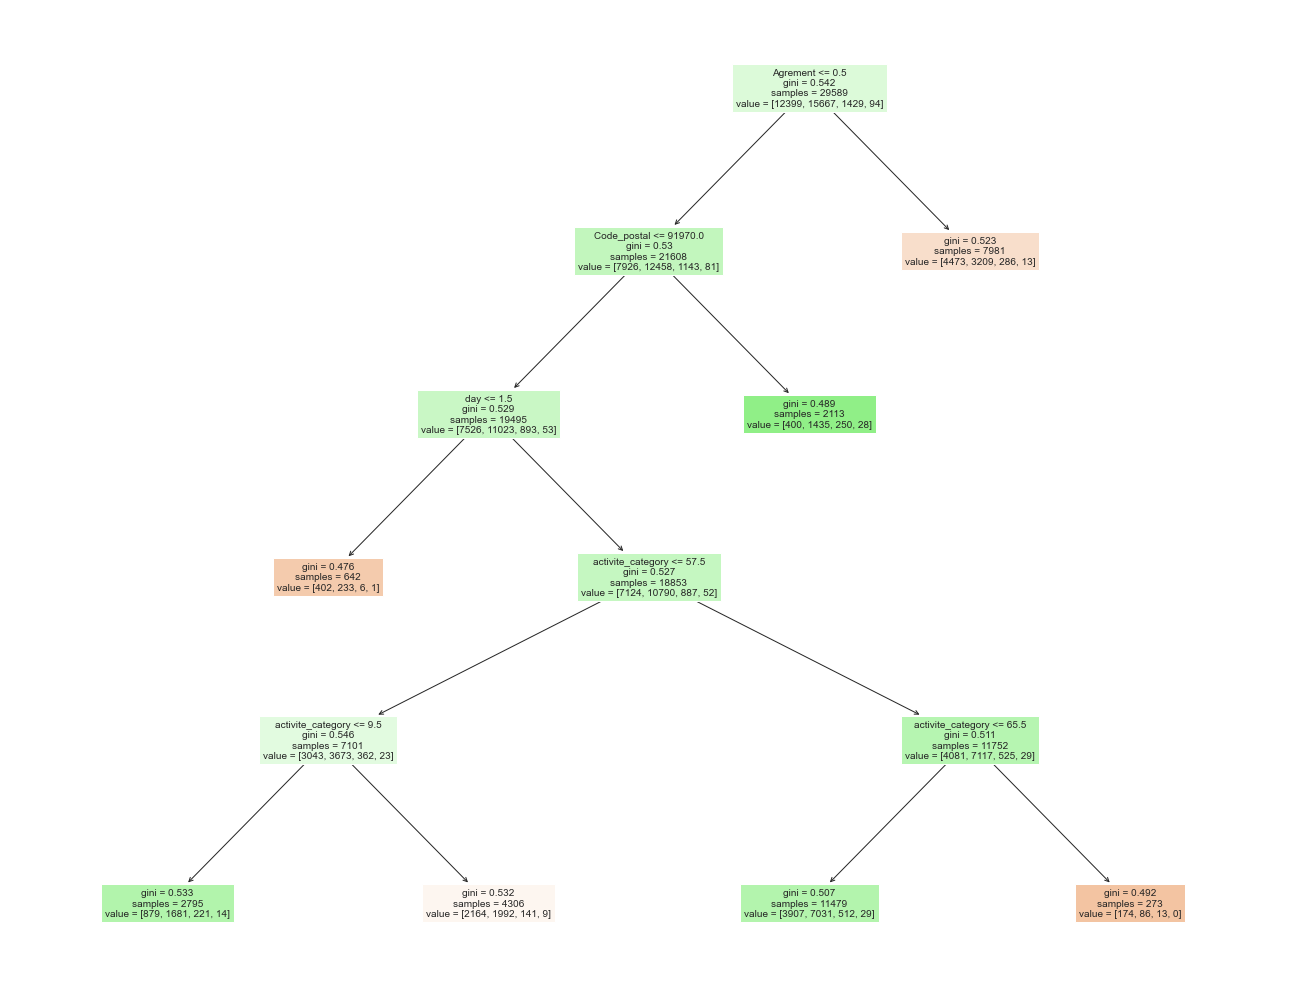

In [196]:
from matplotlib import pyplot as plt

plt.figure(figsize=(23,18))

tree.plot_tree(classifier,fontsize=10,filled=True,feature_names=list(X.columns))

plt.show()

In [197]:
from sklearn.metrics import classification_report
y_pred=classifier.predict(X_test)
print(classification_report(y_test, y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.55      0.58      0.56      3100
           1       0.62      0.65      0.64      3917
           2       0.00      0.00      0.00       357
           3       0.00      0.00      0.00        24

    accuracy                           0.59      7398
   macro avg       0.29      0.31      0.30      7398
weighted avg       0.56      0.59      0.57      7398



In [198]:
from sklearn.metrics import confusion_matrix

classifier_matrix=confusion_matrix(y_test, y_pred)
classifier_matrix

array([[1794, 1306,    0,    0],
       [1363, 2554,    0,    0],
       [ 110,  247,    0,    0],
       [   4,   20,    0,    0]])

<AxesSubplot:>

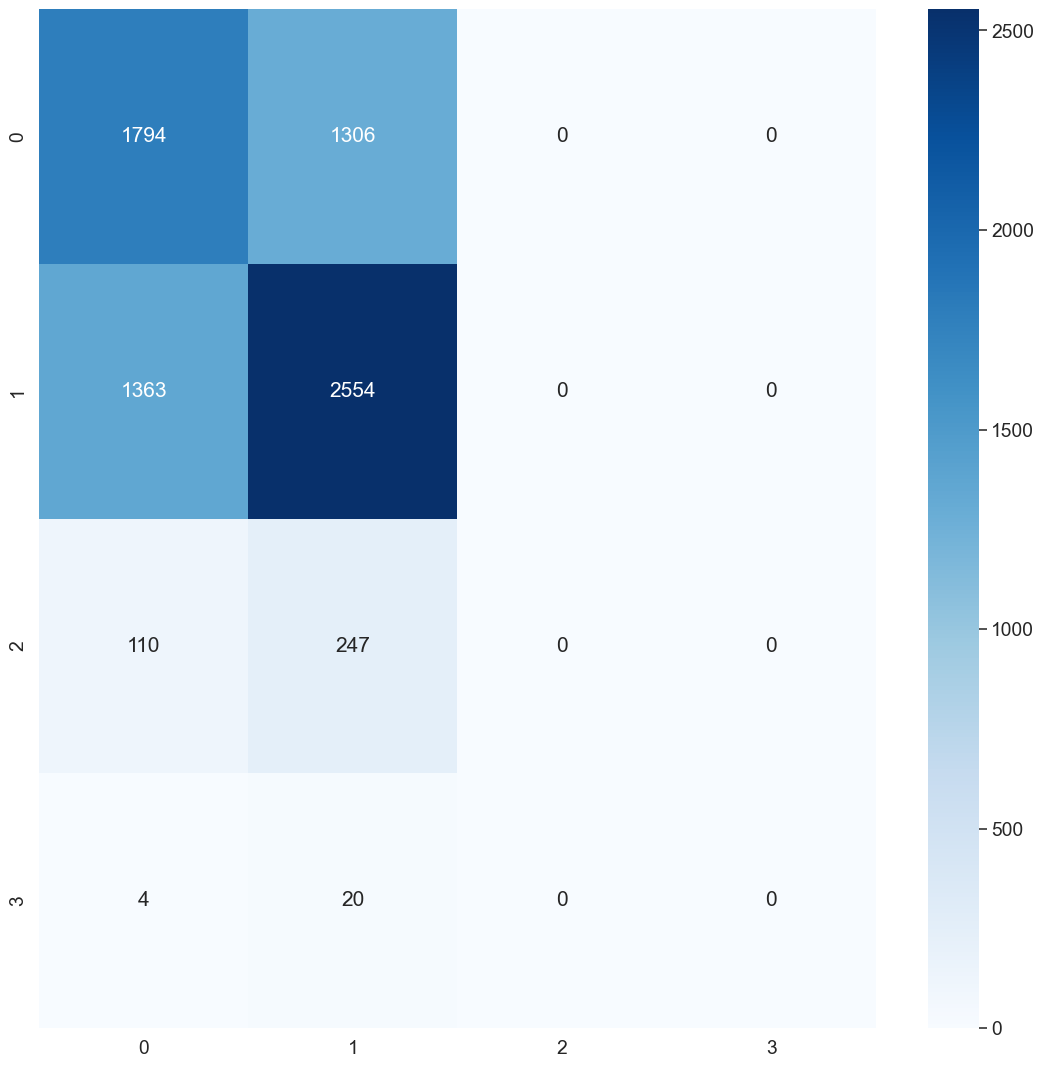

In [199]:
import seaborn as sns
plt.figure(figsize=(15,15),dpi=90)
sns.set(font_scale=1.4)
sns.heatmap(classifier_matrix, annot=True,fmt='g', cmap='Blues')

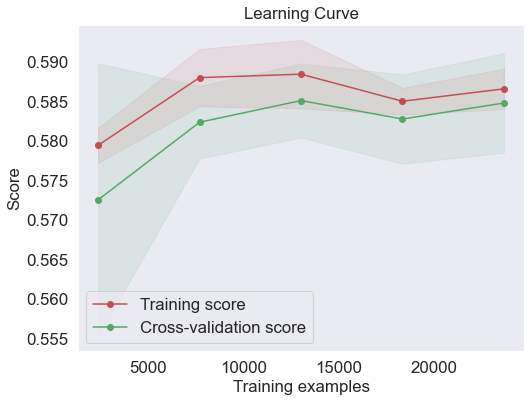

In [200]:

import scikitplot as skplt
skplt.estimators.plot_learning_curve(classifier, X_train, y_train, figsize=(8,6))   
plt.title('Learning Curve')
plt.show()

In [201]:
from sklearn.preprocessing import Normalizer

transform_X=Normalizer().fit(X)
X_norm=transform_X.transform(X)



X_norm_train, X_norm_test, y_train, y_test = train_test_split(X_norm, y,random_state=42,test_size=0.20,stratify=y)



In [202]:
norm_classifier=tree.DecisionTreeClassifier(min_samples_split=50,min_samples_leaf=7,max_leaf_nodes=7,max_depth=30)
norm_classifier.fit(X_norm_train,y_train)

DecisionTreeClassifier(max_depth=30, max_leaf_nodes=7, min_samples_leaf=7,
                       min_samples_split=50)

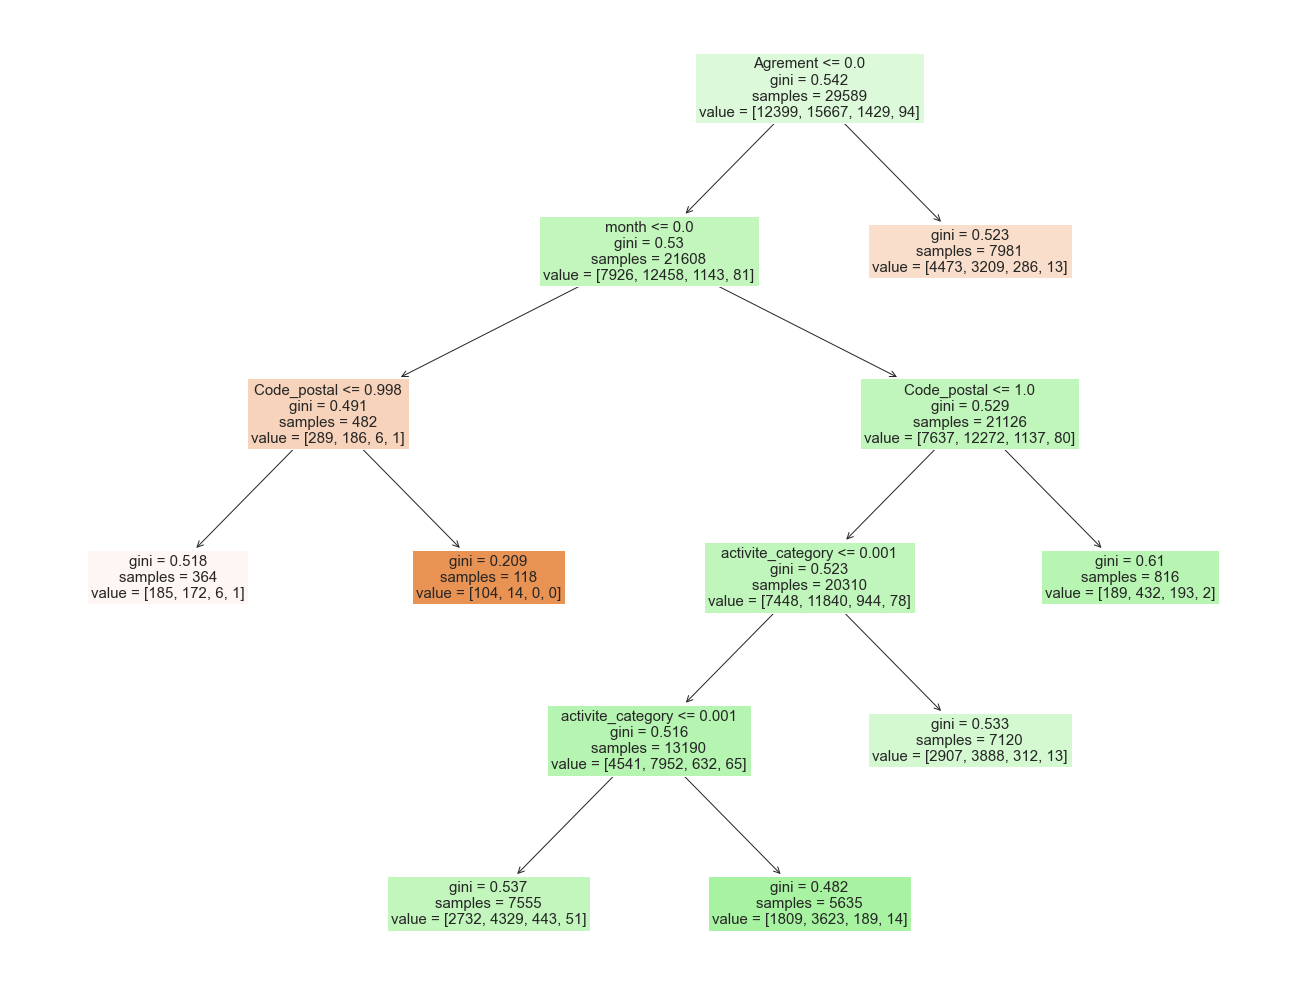

In [203]:

plt.figure(figsize=(23,18))

tree.plot_tree(norm_classifier,fontsize=15,filled=True,feature_names=list(X.columns))

plt.show()

In [204]:
y_norm_pred=norm_classifier.predict(X_norm_test)
print(classification_report(y_test, y_norm_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.57      0.38      0.45      3100
           1       0.58      0.79      0.67      3917
           2       0.00      0.00      0.00       357
           3       0.00      0.00      0.00        24

    accuracy                           0.58      7398
   macro avg       0.29      0.29      0.28      7398
weighted avg       0.54      0.58      0.54      7398



<AxesSubplot:>

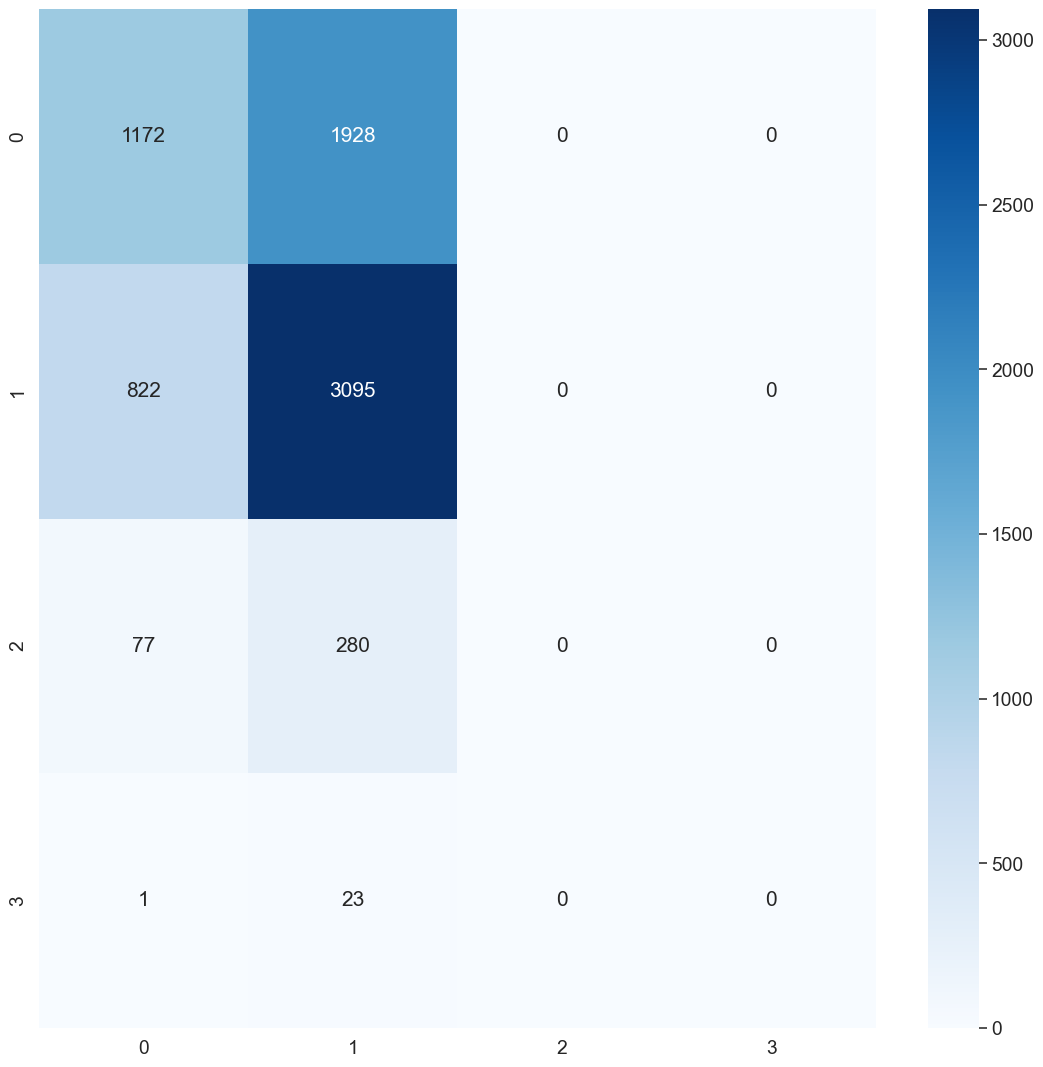

In [208]:
norm_classifier_matrix=confusion_matrix(y_test, y_norm_pred)
plt.figure(figsize=(15,15),dpi=90)
sns.set(font_scale=1.4)
sns.heatmap(norm_classifier_matrix, annot=True,fmt='g', cmap='Blues')

In [206]:
from sklearn.model_selection import KFold
cv_sets = KFold(n_splits=10, shuffle=True, random_state=42)

In [228]:
range_param=[i for i in range(1,12)]
params = {'max_depth':[i for i in range(10,30,10)],'min_samples_leaf':[i for i in range(50,250,25)]}
params

{'max_depth': [10, 20],
 'min_samples_leaf': [50, 75, 100, 125, 150, 175, 200, 225]}

In [229]:
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(norm_classifier, params, scoring='accuracy')

In [230]:
grid_cv.fit(X_norm_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=30, max_leaf_nodes=7,
                                              min_samples_leaf=7,
                                              min_samples_split=50),
             param_grid={'max_depth': [10, 20],
                         'min_samples_leaf': [50, 75, 100, 125, 150, 175, 200,
                                              225]},
             scoring='accuracy')

In [232]:
best_params = grid_cv.best_params_
best_params

{'max_depth': 10, 'min_samples_leaf': 175}

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6a1379aa-ea9c-402c-95ca-194460431a68' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>